### Instructions

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Support Vector Machines - Introduction




---

### Problem Statement

In this project, you are going to create a Support Vector Machine Classification model for classification of different species of Penguins.


---

#### Getting Started:

1. Click on this link to open the Colab file for this project.

     https://colab.research.google.com/drive/1HsyTHufbM712sZgbcahy6EEwPQnnobrU

2. Create a duplicate copy of the Colab file as described below.

  - Click on the **File menu**. A new drop-down list will appear.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

  - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

3. After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project82** format.

4. Now, write your code in the prescribed code cells.


---

### List of Activities

**Activity 1:** Loading and Analysing the Dataset

**Activity 2:**  Data Visualization

**Activity 3:**  Support Vector Classifier - Model Training

**Activity 4:** Model Prediction and Evaluation

---

#### Activity 1:  Analysing the Dataset



You are given with the Seaborn dataset on Penguins. This dataset consists of the following columns:

|Field|Description|
|---:|:---|
|species|Categorical; states species of the Penguin|
|island|Categorical; states home island name for the Penguin in Antartica|
|bill_length_mm|Numeric; Length measured from the upper edge of the beak (bill) to the base of the skull or the first feathers in mm|
|bill_depth_mm|Numeric; Depth measure from the lower edge of the beak to the upper edge in mm|
|flipper_length_mm|Numeric; Length of the fin of the Penguin in mm|
|body_mass_g|Numeric; Body mass of the Penguin in grams.|
|sex|Categorical; Gender of the Penguin|



 **Dataset Link:** https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/penguin.csv

**Dataset Credits:** Python Seaborn Package

**Citation**

```
Allison Marie Horst, Alison Presmanes Hill, & Kristen B Gorman. (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data.

```



 **1.** Load the dataset in a DataFrame

 **2.** Print the first five rows of the dataset.

In [ ]:
# Import the required modules and load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# Load the DataFrame
df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/penguin.csv')
# Display the first five rows of the DataFrame
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


**3.** Print the information of the DataFrame.

In [ ]:
# Print the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


**Q:** Which are the object type (categorical) columns?

**A:**

---
**4.** Find the number of missing values in each column of the DataFrame

In [ ]:
# Print the number of missing values in each column
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

**Q:** Are there any missing values?

**A:** Yes

**Q:** Which columns have missing values?

**A:** bill_length_mm ,  bill_depth_mm ,  flipper_length_mm , body_mass_g,sex  .           
        

  



---

**5.** Drop the missing values from all the columns and verify the same

In [ ]:
# Drop the missing values and verify
# Drop the NAN values
df.dropna(inplace = True)
# Verify the above by printing number of missing values in each column.
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

**6.** Print the number of occurences of each species in `species` column.

In [ ]:
# Display the number of occurrences of each species of Penguin in the 'species' column.
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

**Q:** What are the different species of Penguin available in the column `species`?

**A:**  the different species of Penguin available in the column `species` are Adelie, Gentoo and Chinstrap.

**Q:** What is the type of the column `species`?

**A:** `Integer Type`

---
**7.** Add another column `Label` to the DataFrame to convert the non-numeric target column `species` into numeric. Print first five rows of DataFrame

In [ ]:
# Add numeric column 'label' to resemble non numeric column 'species
df['label'] = df['species'].map({'Adelie' : 0,
                                 'Gentoo' : 1,
                                 'Chinstrap': 2 })

# Print first five rows of the DataFrame
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0


**8.** Print the number of occurences of each species in `label` column.

In [ ]:
# Display the number of occurrences of each species of Penguin in the 'label' column.
df['label'].value_counts()

0    146
1    119
2     68
Name: label, dtype: int64

**Q:** What are the different labels  available in the column `label`?

**A:** 0,1,& 2.

---
**9.** Convert the non-numeric columns `sex` into numeric.

In [ ]:
# Convert the non-numeric column 'sex' to numeric in the DataFrame
# Print the number of occurance of each label in 'sex' column

print(df['sex'].value_counts())

# Convert the 'sex' column to numeric
df['sex'] = df['sex'].map({'Male':0,
                          'Female':1})
# Print the number of occurance of each label in 'sex' column after converting
print('\n',df['sex'].value_counts())


# Print the Datatype of teh 'sex' column
print('\n',type(df['sex']))

Male      168
Female    165
Name: sex, dtype: int64

 0    168
1    165
Name: sex, dtype: int64

 <class 'pandas.core.series.Series'>


**10.** Convert the non-numeric columns `island` into numeric.

In [ ]:
# Convert the non-numeric column 'island' to numeric in the DataFrame
# Print the number of occurance of each label in 'island' column

print(df['island'].value_counts())

# Convert the 'island' column to numeric
df['island'] = df['island'].map({'Biscoe':0,
                                  'Dream':1,
                                  'Torgersen':2})

# Print the number of occurance of each label in 'island' column after converting
print('\n',df['island'].value_counts())
# Print the Datatype of the 'island' column
print('\n',type(df['island']))

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

 0    163
1    123
2     47
Name: island, dtype: int64

 <class 'pandas.core.series.Series'>


**Hint:** For conversion of non-numeric columns to numeric use the `map()` function

**After this activity, the dataset should be loaded in the DataFrame and the required columns should be of numeric type.**

---

#### Activity 2:  Data Visualization

In this activity, you have to create scatter plots for different features and each plot differentiate between the data points of different classes (Species of the Penguin).

**1.** Create a scatter plot between `bill_length_mm` and `bill_depth_mm`

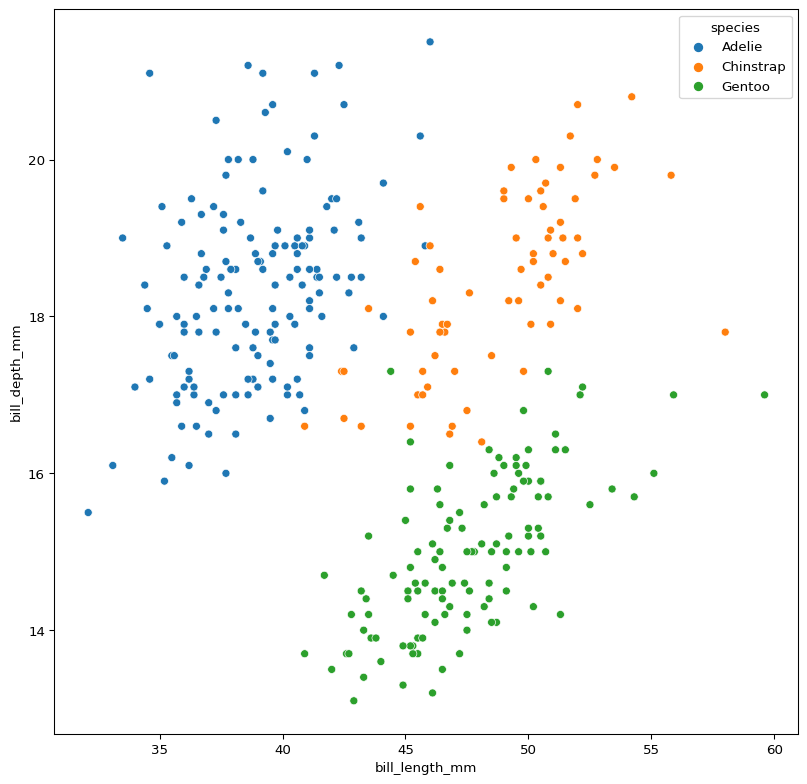

In [ ]:
# Create a scatter plot between 'bill_length_mm' and 'bill_depth_mm'
import seaborn as sns
plt.figure(figsize=(10,10),dpi = 96)
sns.scatterplot(x =df['bill_length_mm'],y =df['bill_depth_mm'],hue= df['species'])
plt.show()

**Q** Write your interpretation about the output of the graph.

**A** Few of the datapoints are overlapped to each other.

---
**2.** Create a scatter plot between `bill_length_mm` and `flipper_length_mm`.

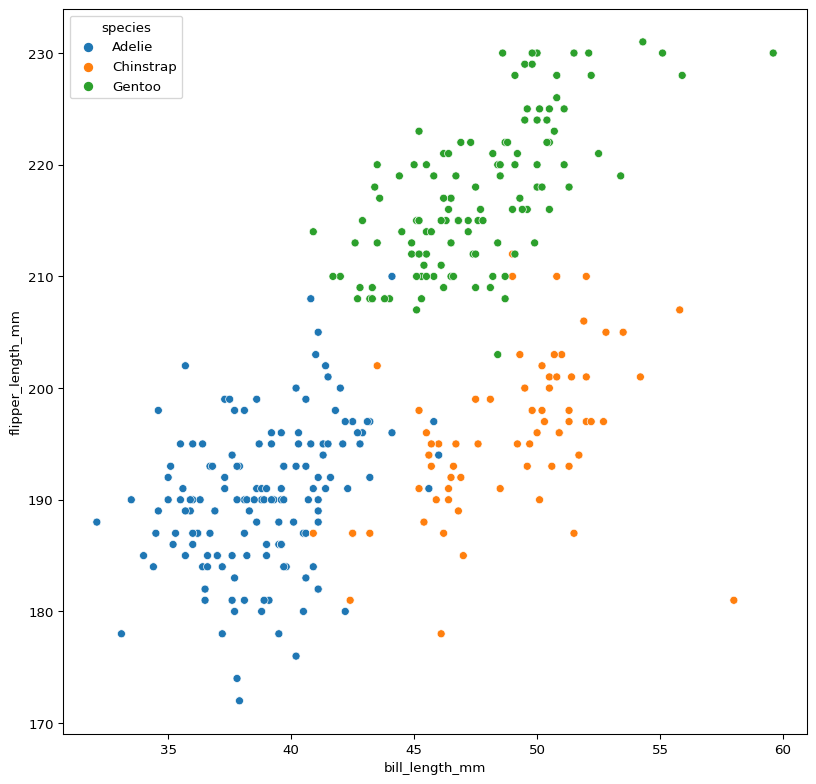

In [ ]:
# Create a scatter plot between 'bill_length_mm' and 'flipper_length_mm'
plt.figure(figsize=(10,10),dpi = 96)
sns.scatterplot(x=df['bill_length_mm'],y =df['flipper_length_mm'],hue = df['species'])
plt.show()

**Q** Write your interpretation about the output of the graph.

**A** The above datapoints are overalapped to each other.

---

**3.** Create a scatter plot between `bill_depth_mm` and `flipper_length_mm`.

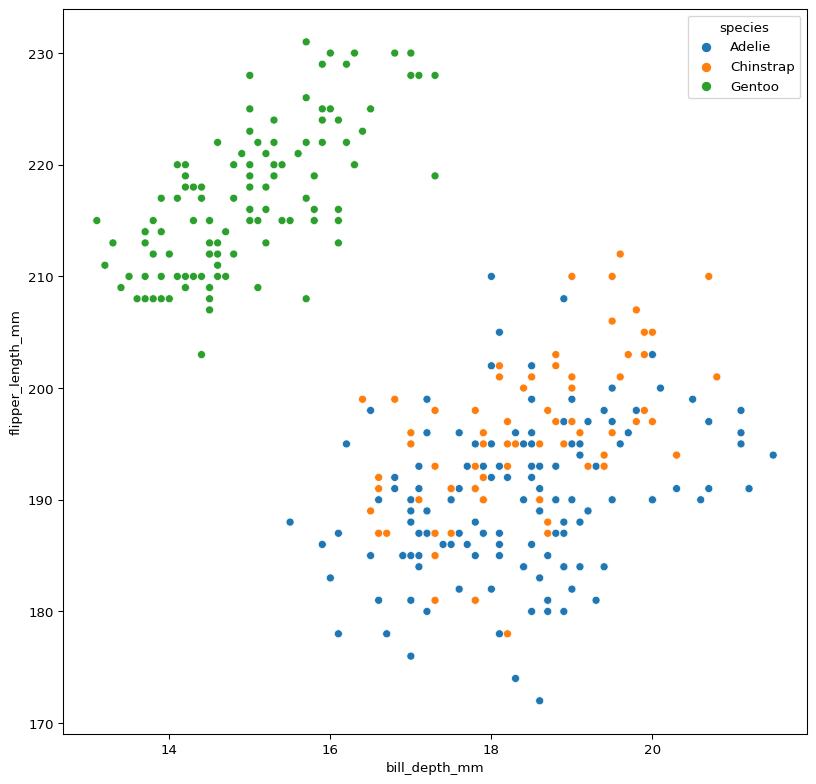

In [ ]:
# Create a scatter plot between 'bill_depth_mm' and 'flipper_length_mm'
plt.figure(figsize=(10,10),dpi = 96)
sns.scatterplot(x=df['bill_depth_mm'],y =df['flipper_length_mm'],hue = df['species'])
plt.show()

**Q** Write your interpretation about the output of the graph.

**A** Gentoo has small datapoints where as other two datapoints are overlapping to each other.


**After this activity, the relation between the independent features of Penguins and their speicies should be recognised. Also, student can create more such Visualization for understanding the relation between rest of the columns**

---

#### Activity 3: Train-Test Split

We need to predict the value of the `label` variable, using other variables to predict the species of the Penguin. Thus, `label` is the dependent variable and `island`, `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`, `sex` columns are the independent variables.

**1.** Split the dataset into the training set and test set such that the testing set contains 33% of the instances and the remaining instances will become the training set.

**2.** Set `random_state = 42`.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    int64  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
 7   label              333 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 23.4+ KB


In [ ]:
# Split the data into Training and Testing set
# Import all the libraries
from sklearn.model_selection import train_test_split
# Create X and y variables
X = df.iloc[:,1:7]
y = df['label']
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.33,random_state = 42)

**After this activity, the features and target data should be splitted into training and testing data.**

---

#### Activity 4: Support Vector Classifier - Model Training

Implement Linear Support Vector Classification using `sklearn.svm` module in the following way:

1. Deploy the model by importing the `SVC` class and create an object of this class.
2. Call the `fit()` function on the Support Vector Classifier object and print the score using the `score()` function.


In [ ]:
# Build a SVC model using the 'sklearn' module.
from sklearn.svm import SVC

# 1. First, call the linear 'SVC' module and store it in a variable.
svc_model = SVC(kernel ='linear')
# 2. Call the 'fit()' function with 'x_train' and 'y_train' as inputs.
svc_model.fit(X_train,y_train)
# 3. Call the 'score()' function with 'x_train' and 'y_train' as inputs to check the accuracy score of the model.
svc_model.score(X_train,y_train)

1.0

**Q** What is the accuracy score?

**A** 1

**After this activity, a SVC model object should be trained for multiclass classification.**

---

#### Activity 5: Model Prediction and Evaluation

In this activity, you will make predictions for training and testing set and evaluate the model

**1.** Predict the values for training set by calling the `predict()` function on the Logistic Regression object.

**2.** Print the distribution of the labels predicted in the predicted target series for the training features.


In [ ]:
# Make predictions on the train dataset by using the 'predict()' function.
# Compute the predictions
svc_pred_y_train = pd.Series(svc_model.predict(X_train))


# Print the occurrence of each type computed in the predictions.
svc_pred_y_train.value_counts()

0    94
1    81
2    48
dtype: int64

**Q:** Are all the label values predicted for the training features data?

**A:** Yes

---
**3.** Predict the values for testing set by calling the `predict()` function on the Logistic Regression object.

**4.** Print the distribution of the labels predicted in the predicted target series for the testing features.

In [ ]:
#Make predictions on the test dataset by using the 'predict()' function.
# Compute the predictions
svc_pred_y_test = pd.Series(svc_model.predict(X_test))

# Print the occurrence of each Penguin type computed in the predictions.
svc_pred_y_test.value_counts()

0    52
1    38
2    20
dtype: int64

**Q:** Are all the labels predicted for the test features data?

**A:** Yes

---
**5.** Display the confusion matrix for the test set:


In [ ]:
# Print the confusion matrix for the actual and predicted data of the test set
from sklearn.metrics import  confusion_matrix,classification_report
print(confusion_matrix(y_test,svc_pred_y_test))

[[52  0  0]
 [ 0 38  0]
 [ 0  0 20]]


**Q** Are there any False Positives or False Negatives?

**A** No

---

**6.** Display the classification report for the test set:

In [ ]:
# Print the classification report for the actual and predicted data of the testing set (if required)
print(classification_report(y_test,svc_pred_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        20

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110



**Q** What is the f1-score for all the labels?

**A** The f1-sore for all the labels is 1 .

**After this activity, labels should be predicted for the target columns using test features set and the model should be evaluated for the same.**

---

**Write your interpretation of the results here.**

- Interpretation 1:

- Interpretation 2:

---

### Submitting the Project

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, make sure that '**Anyone on the Internet with this link can view**' option is selected and then click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>

3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_Project82**) of the notebook will get copied.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.
   
   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_Project82** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>

---